1\. Write a function that converts number representation (bin<->dec<->hex)

In [18]:
def rep_converter(n, conversion):
    if conversion == "BinToDec":
        dec, i = 0, 1
        for s in str(n):
            dec += int(s) * 2**(len(str(n)) - i)
            i += 1
        print(dec)
    
    elif conversion == "DecToBin":
        if n > 1:
            rep_converter(n//2, conversion)
        print(n%2,end='')
    
    elif conversion == "HexToDec":
        dec, i, val = 0, 1, 0
        for s in str(n):
            if s == 'a':
                val = 10
            elif s == 'b':
                val = 11
            elif s == 'c':
                val = 12
            elif s == 'd':
                val = 13
            elif s == 'e':
                val = 14
            elif s == 'f':
                val = 15
            else:
                val = int(s)
            dec += val * 16**(len(str(n)) - i)
            i += 1
        print(dec)

    elif conversion == "DecToHex":
        if n > 15:
            rep_converter(n//16, conversion)
        if n%16 == 10:
            print('a',end='')
        elif n%16 == 11:
            print('b',end='')
        elif n%16 == 12:
            print('c',end='')
        elif n%16 == 13:
            print('d',end='')
        elif n%16 == 14:
            print('e',end='')
        elif n%16 == 15:
            print('f',end='')
        else:
            print(n%16,end='')
    else:
        print("Error on input")

In [19]:
x = 57
print('b/10110101 to dec:')
rep_converter('10110101',"BinToDec")
print('\n57 to bin:')
rep_converter(x,"DecToBin")
print('\n\nx/e23a5 to dec:')
rep_converter('e23a5',"HexToDec")
print('\n43164 to hex:')
rep_converter(43164,"DecToHex")

b/10110101 to dec:
181

57 to bin:
111001

x/e23a5 to dec:
926629

43164 to hex:
a89c

2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [20]:
import math

In [21]:
def word2float(x):
    sign = int(x[0])
    if sign == 1:
        sign = -1
    elif sign == 0:
        sign = 1
    
    base = 0
    for i in range(1,9):
        base += int(x[i]) * 2**(8-i)
    base = base - 127
    
    mantissa = 1
    for i in range(9,32):
        mantissa += int(x[i]) * 2**(8-i)
    
    # print(sign)
    # print(base)
    # print(mantissa)
    
    return sign * (2**base) * mantissa

3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [22]:
x = 1
while x < float('Inf'):
    if x*2 == float('Inf'):
        print('Overflow limit:',x)
    x *= 2.

# print(x)

x = 1
while x != 0:
    if x/2 == 0:
        print('Underflow limit:',x)
    x /= 2

#print(x)

Overflow limit: 8.98846567431158e+307
Underflow limit: 5e-324


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [23]:
x = 1.0
y = 1.1
epsilon = x/2

while x != y:
    epsilon = epsilon/2
    y = x + epsilon
    # print(epsilon)

print("Machine precision:", epsilon,'÷',epsilon/2)

Machine precision: 1.1102230246251565e-16 ÷ 5.551115123125783e-17


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [24]:
from math import sqrt

In [25]:
def quad_solution_1(a, b, c):
    sqrt_delta = sqrt(b**2 - 4*a*c)
    
    x_1 = (-b + sqrt_delta)/(2*a)
    x_2 = (-b - sqrt_delta)/(2*a)
    
    return x_1, x_2

def quad_solution_2(a, b, c):
    sqrt_delta = sqrt(b**2 - 4*a*c)
    
    num = 2*c
    x_1 = num / (-b - sqrt_delta)
    x_2 = num / (-b + sqrt_delta)
    
    return x_1, x_2

# Stable
def quad_solution_3(a, b, c):
    sqrt_delta = sqrt(b**2 - 4*a*c)
    
    num = 2*c
    
    if b>0:
        den = -b - sqrt_delta
    else:
        den = -b + sqrt_delta
    
    return num/den, den/(2*a)

In [26]:
x_1, x_2 = quad_solution_1(0.001, 1000, 0.001)
print(x_1)
print(x_2)

x_1, x_2 = quad_solution_2(0.001, 1000, 0.001)
print('')
print(x_1)
print(x_2)

# Stable
x_1, x_2 = quad_solution_3(0.001, 1000, 0.001)
print('')
print('Stable solution')
print('x_1:',x_1)
print('x_2:',x_2)

-9.999894245993346e-07
-999999.999999

-1.000000000001e-06
-1000010.5755125057

Stable solution
x_1: -1.000000000001e-06
x_2: -999999.999999


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

In [27]:
import matplotlib.pyplot as plt

In [28]:
def func(x):
    return x*(x-1)

def dev_func(x):
    return 2*x-1

def derivative(func,x,delta):
    return (func(x+delta) - func(x)) / delta

print("Numerically computed value (delta=10e-2):", derivative(func,1,10e-2))
print("Analytically computed value:", dev_func(1))

print("Numerically computed value (delta=10e-4):", derivative(func,1,10e-4))
print("Numerically computed value (delta=10e-6):", derivative(func,1,10e-6))
print("Numerically computed value (delta=10e-8):", derivative(func,1,10e-8))
print("Numerically computed value (delta=10e-10):", derivative(func,1,10e-10))
print("Numerically computed value (delta=10e-12):", derivative(func,1,10e-12))
print("Numerically computed value (delta=10e-14):", derivative(func,1,10e-14))

Numerically computed value (delta=10e-2): 1.100000000000001
Analytically computed value: 1
Numerically computed value (delta=10e-4): 1.0009999999998895
Numerically computed value (delta=10e-6): 1.0000100000065513
Numerically computed value (delta=10e-8): 1.0000001005838672
Numerically computed value (delta=10e-10): 1.000000083740371
Numerically computed value (delta=10e-12): 1.000000082750371
Numerically computed value (delta=10e-14): 0.9992007221627407


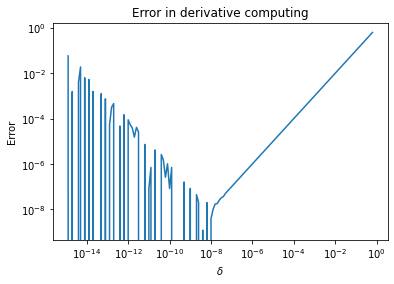

In [29]:
delta = [10**(-i/10) for i in range(2,150)]
acc = [derivative(func,1,d) - dev_func(1) for d in delta]

plt.clf()
plt.plot(delta,acc)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\delta$')
plt.ylabel('Error')
plt.title('Error in derivative computing')
plt.show()

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [30]:
from math import sqrt,pi

In [32]:
x_min = -1
x_max =  1
%time
N = 100
integral = 0
xs = [x_min + (x_max-x_min)*i/N for i in range(N+1)]    
for i in range(N):
    integral += (xs[i+1]-xs[i])*sqrt(1-xs[i]**2)
print('I =',integral,'\nError =',pi/2-integral)

Wall time: 0 ns
I = 1.5691342555492507 
Error = 0.0016620712456458797


In [33]:
%time
N = 10000
integral = 0
xs = [x_min + (x_max-x_min)*i/N for i in range(N+1)]    
for i in range(N):
    integral += (xs[i+1]-xs[i])*sqrt(1-xs[i]**2)
print('I =',integral,'\nError =',pi/2-integral)

Wall time: 0 ns
I = 1.570794663715299 
Error = 1.663079597591377e-06


In [34]:

%time
N = 1000000
integral = 0
xs = [x_min + (x_max-x_min)*i/N for i in range(N+1)]    
for i in range(N):
    integral += (xs[i+1]-xs[i])*sqrt(1-xs[i]**2)
print('I =',integral,'\nError =',pi/2-integral)

Wall time: 0 ns
I = 1.5707963251318608 
Error = 1.663035709142946e-09


In [35]:
%time
N = 100000000
integral = 0
xs = [x_min + (x_max-x_min)*i/N for i in range(N+1)]    
for i in range(N):
    integral += (xs[i+1]-xs[i])*sqrt(1-xs[i]**2)
print('I =',integral,'\nError =',pi/2-integral)

Wall time: 0 ns
I = 1.5707963267937544 
Error = 1.142197447734361e-12
